<a href="https://colab.research.google.com/github/AaryanAnand10/IMDB-Movies-Dataset/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.model_selection import *
from sklearn.linear_model import *
import sys
import torch
from torch import *
from keras.preprocessing.sequence import *
from torch.utils.data import *
from torch.optim import *
from torch.nn.utils import *
from IPython.display import *
%matplotlib inline

In [3]:
path = "/content/imdb_top_1000.csv"
df=pd.read_csv(r"/content/imdb_top_1000.csv")

In [4]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [9]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [10]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
print("The shape of the dataset is: {} rows and {} columns".format(df.shape[0], df.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


In [12]:

df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IMDB_Rating,Meta_score,No_of_Votes
IMDB_Rating,1.000000,0.268531,0.494979
Meta_score,0.268531,1.000000,-0.018507
No_of_Votes,0.494979,-0.018507,1.000000


In [13]:
df.describe(include = ['O'])


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


**Explore the data to identify the most popular genre of movies and TV**

In [16]:
#Create a new dataframe containing the count of movies/TV shows in each genre
movie_genre=df.groupby('Genre')['Series_Title'].count().sort_values(ascending=False)
movie_genre = pd.DataFrame(movie_genre).rename(columns={'Series_Title': 'Count'})
movie_genre.head(30)

,Count
Genre,
Drama,85
"Drama, Romance",37
"Comedy, Drama",35
"Comedy, Drama, Romance",31
"Action, Crime, Drama",30
"Crime, Drama, Thriller",28
"Biography, Drama, History",28
"Crime, Drama, Mystery",27
"Crime, Drama",26


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

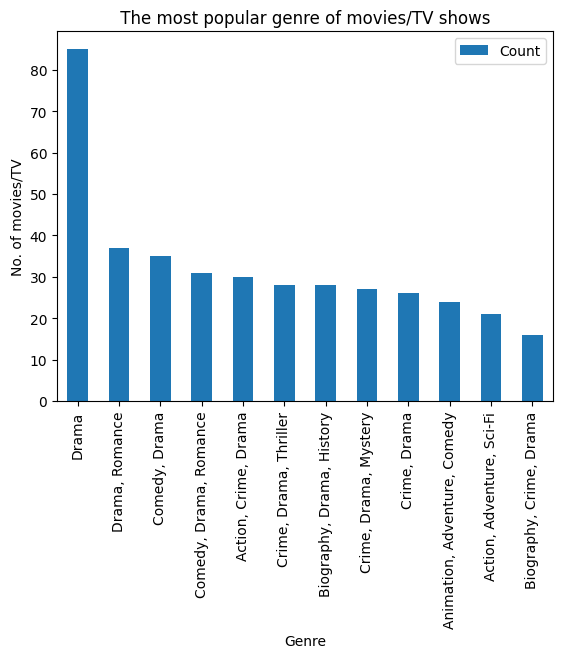

In [19]:
movie_genre.head(12).plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("No. of movies/TV")
plt.title(" The most popular genre of movies/TV shows ")
plt.show()

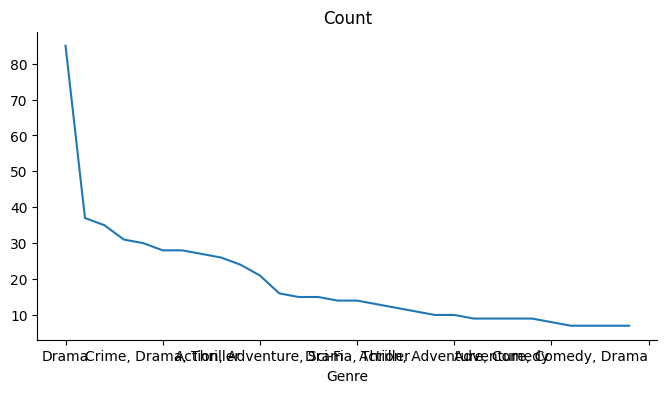

In [17]:
from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
movie_director=df.groupby('Director')['Series_Title'].count().sort_values(ascending=False)
movie_director = pd.DataFrame(movie_director).rename(columns={'Series_Title': 'Count'})
movie_director.head(20)

,Count
Director,
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Stanley Kubrick,9
Woody Allen,9
Billy Wilder,9
Quentin Tarantino,8


In [21]:
df.sort_values(by=['IMDB_Rating']).tail(20)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
25,https://m.media-amazon.com/images/M/MV5BMTUxMz...,The Green Mile,1999,A,189 min,"Crime, Drama, Fantasy",8.6,The lives of guards on Death Row are affected ...,61.0,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,"136,801,374"
17,https://m.media-amazon.com/images/M/MV5BZjA0OW...,One Flew Over the Cuckoo's Nest,1975,A,133 min,Drama,8.7,A criminal pleads insanity and is admitted to ...,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,"112,000,000"
16,https://m.media-amazon.com/images/M/MV5BYmU1ND...,Star Wars: Episode V - The Empire Strikes Back,1980,UA,124 min,"Action, Adventure, Fantasy",8.7,After the Rebels are brutally overpowered by t...,82.0,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,1159315,"290,475,067"
15,https://m.media-amazon.com/images/M/MV5BY2NkZj...,Goodfellas,1990,A,146 min,"Biography, Crime, Drama",8.7,The story of Henry Hill and his life in the mo...,90.0,Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco,1020727,"46,836,394"
14,https://m.media-amazon.com/images/M/MV5BNzQzOT...,The Matrix,1999,A,136 min,"Action, Sci-Fi",8.7,When a beautiful stranger leads computer hacke...,73.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,1676426,"171,479,930"
13,https://m.media-amazon.com/images/M/MV5BZGMxZT...,The Lord of the Rings: The Two Towers,2002,UA,179 min,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,"342,551,365"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"
12,https://m.media-amazon.com/images/M/MV5BOTQ5ND...,"Il buono, il brutto, il cattivo",1966,A,161 min,Western,8.8,A bounty hunting scam joins two men in an unea...,90.0,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffrè,688390,"6,100,000"


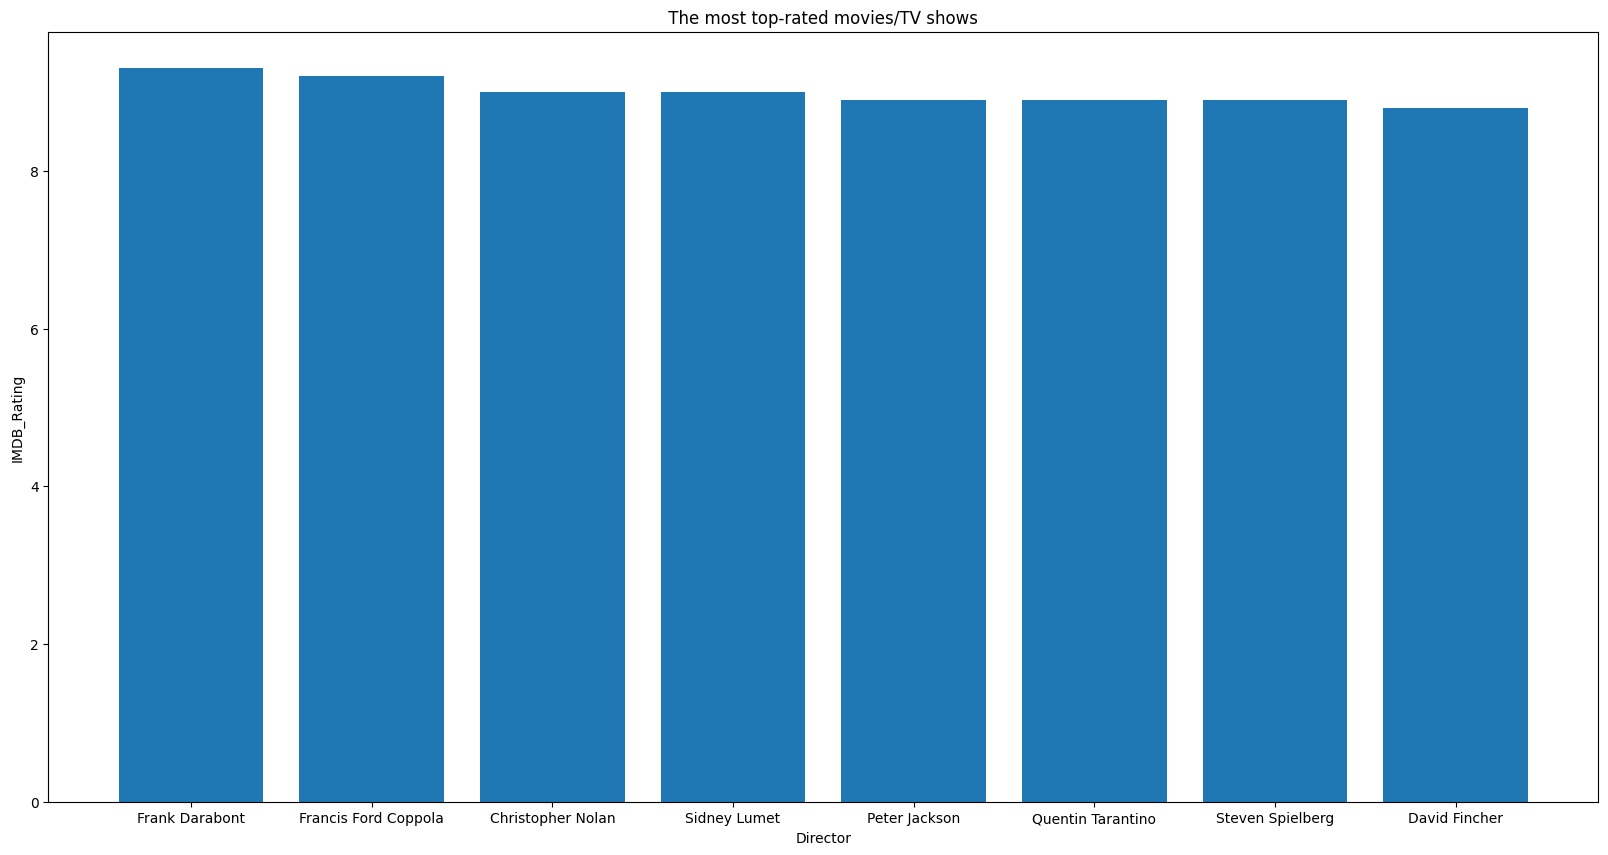

In [22]:
director = df['Director'].head(10)
impd_rating = df['IMDB_Rating'].sort_values(ascending=False).head(10)
fig = plt.figure(figsize =(20, 10))
plt.xlabel("Director")
plt.ylabel("IMDB_Rating")
plt.title(" The most top-rated movies/TV shows ")
plt.bar(director[0:10], impd_rating[0:10])
plt.show()

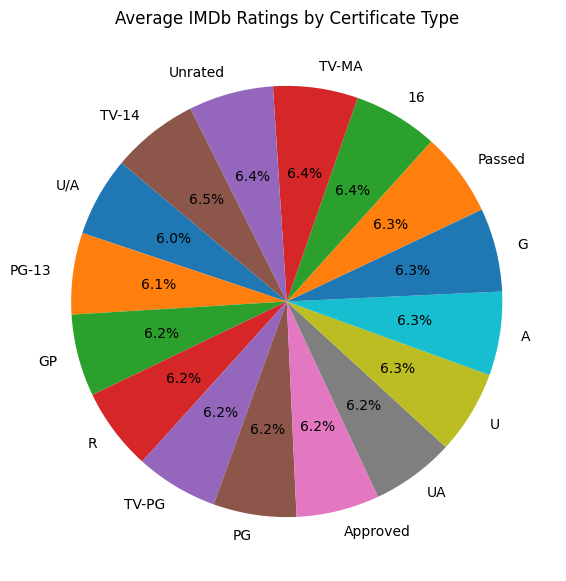

In [26]:
average_ratings = df.groupby('Certificate')['IMDB_Rating'].mean().sort_values()
plt.figure(figsize=(10,7))
plt.pie(average_ratings, labels=average_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Average IMDb Ratings by Certificate Type')
plt.show()

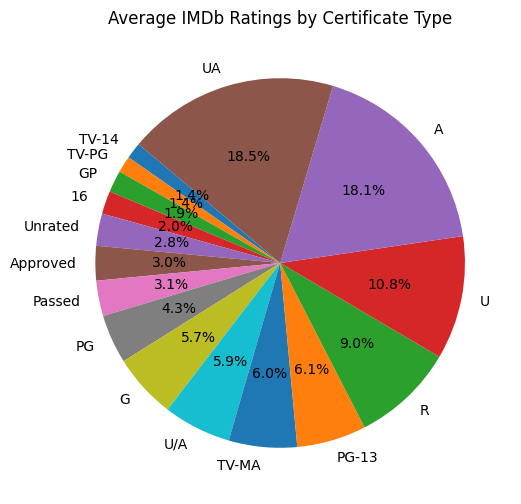

In [24]:
average_ratings = df.groupby('Certificate')['No_of_Votes'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.pie(average_ratings, labels=average_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Average IMDb Ratings by Certificate Type')
plt.show()